In [1]:
import os
import re
from glob import glob
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

In [2]:
root_path = "../../Data/Experiment_8"

In [4]:
data_high = {re.findall("high_(\w+)\.", p)[0]: np.load(p) for p in glob(os.path.join(root_path, "*")) if "high" in p}
for k, v in data_high.items(): print(k, v.shape)

achrom (5, 20, 256, 256, 3)
yellow_blue (5, 20, 256, 256, 3)
red_green (5, 20, 256, 256, 3)


In [13]:
data_low = {re.findall("low_(\w+)\.", p)[0]: np.load(p) for p in glob(os.path.join(root_path, "*")) if "_low_" in p}
for k, v in data_low.items(): print(k, v.shape)

red_green (5, 20, 256, 256, 3)
yellow_blue (5, 20, 256, 256, 3)
achrom (5, 20, 256, 256, 3)


In [14]:
freqs = np.array([1.5, 3, 6, 12, 24])
freqs

array([ 1.5,  3. ,  6. , 12. , 24. ])

In [23]:
# for name, chroma in data.items():
#     for dat in chroma:
#         fig, axes = plt.subplots(1,len(dat))
#         for ax, d in zip(axes.ravel(), dat):
#             ax.imshow(d)
#             ax.axis("off")
#         plt.show()

In [15]:
def model(img):
    return img
def calculate_diffs(img1, img2):
    a, b = model(img1), model(img2)
    return ((a-b)**2).mean(axis=(1,2,3))**(1/2)

In [16]:
def obtain_results(data):
    diffs = defaultdict(dict)
    for name, chroma in data.items():
        for f, dat in zip(freqs, chroma):
            diffs_ = calculate_diffs(dat, dat[0:1])
            diffs[name][f] = diffs_
    return diffs

In [21]:
diffs_high = obtain_results(data_high)
diffs_low = obtain_results(data_low)

In [22]:
def plot_diffs(diffs):
    fig, axes = plt.subplots(1,len(diffs), figsize=(12,4))
    for (name, chroma), ax in zip(diffs.items(), axes.ravel()):
        for f, dat in chroma.items():
            ax.plot(dat, label=f)
        ax.legend()
        ax.set_title(name)
    plt.show()

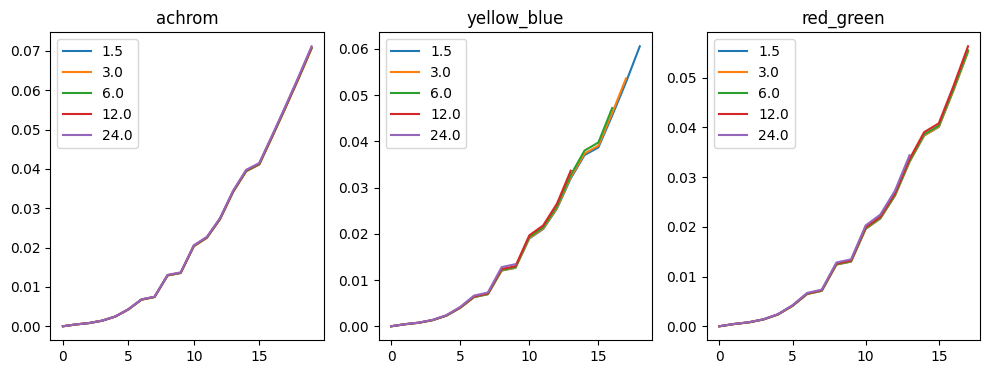

In [23]:
plot_diffs(diffs_high)

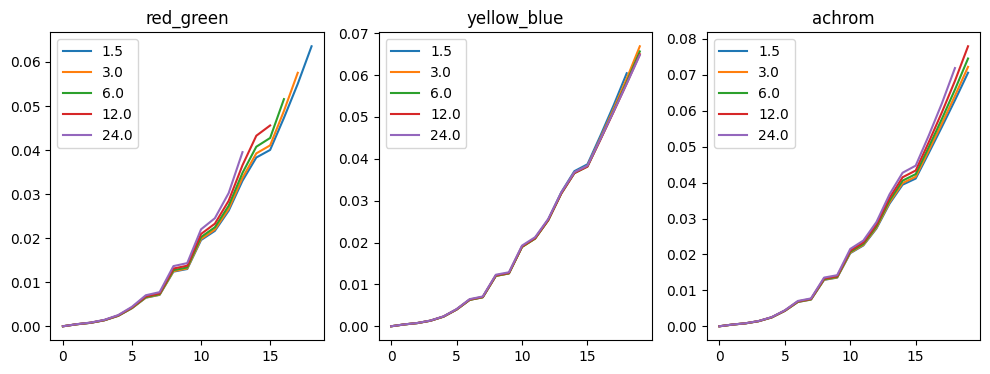

In [24]:
plot_diffs(diffs_low)